## Logistic Regression

- Very easy to implement and performs very well on linearly seperable classes. 
- One of the most used algorithms for classifications in industry

In [41]:
# Jayson Francis

# Plotting the Sigmoid Function, (Logistic Function) (S-shaped, sigmoidal curve)

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
def sigmoid(z):
    return (1.0 / (1.0 + np.exp(-z)))

In [8]:
z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)

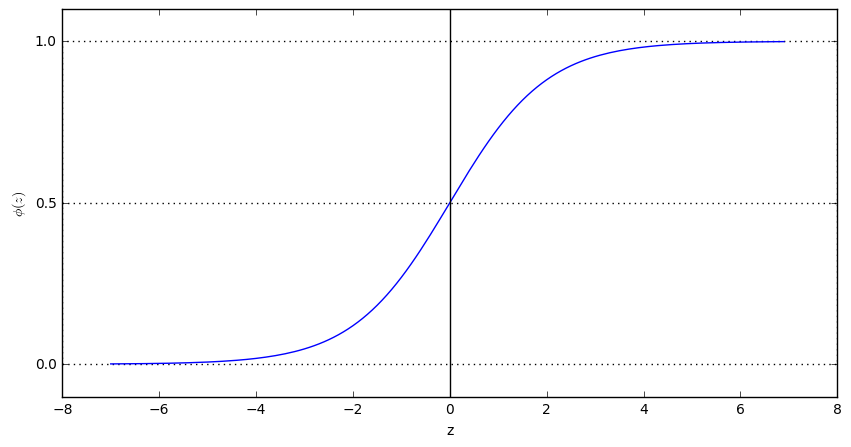

In [34]:
plt.plot(z, phi_z)


plt.axvline(0.0, color='k') # Vertical Line
plt.axhline(y=0.5, ls='dotted', color='k') # Horizontal Line

plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted') # Asymtope lines

plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1) # Increasing boundaries 

plt.xlabel('z')
plt.ylabel('$\phi (z)$')


plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

# Assign petal length and petal width to X matrix (150 samples)
X = iris.data[:, [2, 3]]

# Class labels
y = iris.target

# Split the dataset into separate training and test datasets.
from sklearn.cross_validation import train_test_split

# Split the X and y arrays into 30 percent test data, and 70 (45 samples) percent training data (105 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Optimization - Feature scaling
from sklearn.preprocessing import StandardScaler

# Initlalize a new StandardScaler object, sc
sc = StandardScaler()

# Using the fit method, estimate the sample mean and standard deviation for each feature demension. 
sc.fit(X_train)

# Transform both training and test sets using the sample mean and standard deviations
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [22]:
# Plotting function
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all the samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
        
    # highlight the test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')
    

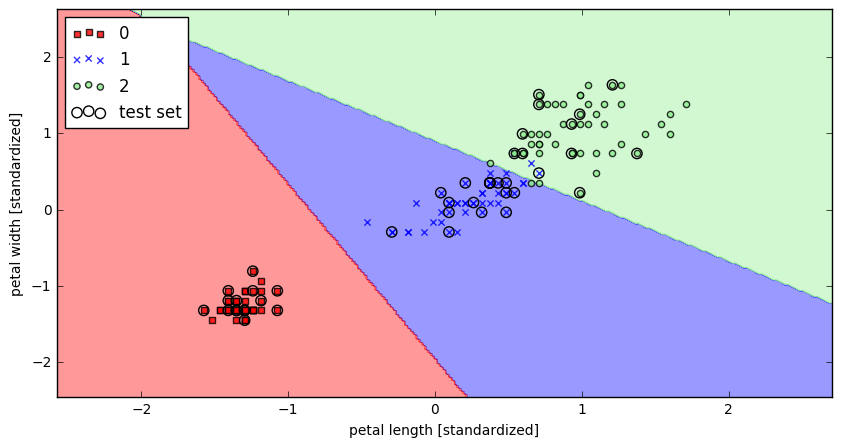

In [35]:
lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Tackling overfitting via regularization

- **Overfitting**, high variance (variability, sensitive to randomness in the data). Model performs well on seen data.
- **Underfitting**, high bias (measure of the systematic error that is not due to randomness). Model performs low on unseen data.



- **Regularization** is a usefull method to handle collinearity (high correlation among features), filter out noise from data, and eventually prevent overfitting. 
- To make sure regularization works properly, ensure that all features are on a **comparable scale** (feature scaling standardization)



The figure below, you can see that the weight coefficients shrink if we decrease the parameter **C**, that is, when we icnrease the **regularization strength**

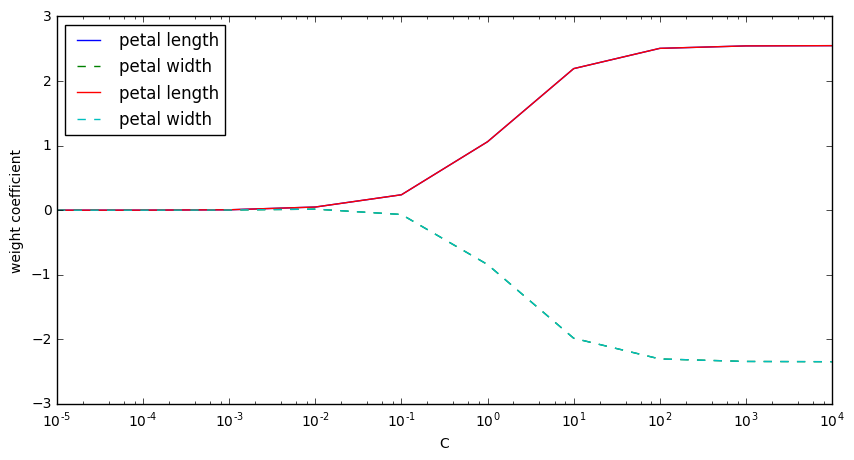

In [39]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0], label='petal length')

plt.plot(params, weights[:, 1], linestyle='--', label='petal width')

plt.ylabel('weight coefficient')
plt.xlabel('C')

plt.legend(loc='upper left')
plt.xscale('log')

plt.show()